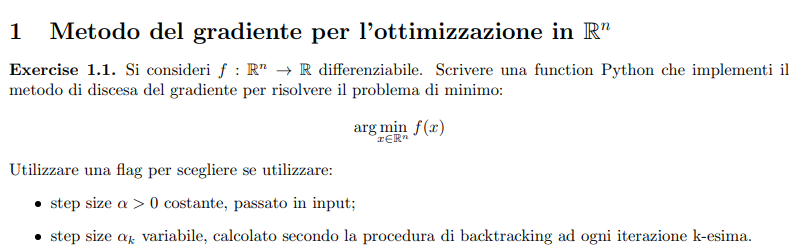

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def next_step(x,grad,f): # backtracking procedure for the choice of the steplength
  alpha=1.1
  rho = 0.5
  c1 = 0.25
  p=-grad
  j=0
  jmax=10
  while ((f(x+alpha*p) > f(x) + c1*alpha*np.dot(grad,p)) and j<jmax ):
    alpha= rho*alpha
    j+=1
  if (j>jmax):
    return -1
  else:
    #print('alpha=',alpha)
    return alpha


def minimize(f,grad_f,x0,step,maxit,tol,xTrue,fixed=True): # funzione che implementa il metodo del gradiente
  #declare x_k and gradient_k vectors
  # x_list only for logging
  x_list=np.zeros((2,maxit+1))

  norm_grad_list=np.zeros(maxit+1)
  function_eval_list=np.zeros(maxit+1)
  error_list=np.zeros(maxit+1)

  #initialize first values
  x_last = x0

  x_list[:,0] = x_last

  k=0

  function_eval_list[k]=f(x_last)
  error_list[k]=np.linalg.norm(x_last - xTrue)
  norm_grad_list[k]=np.linalg.norm(grad_f(x_last))

  while (np.linalg.norm(grad_f(x_last))>tol and k < maxit ):
    k=k+1
    grad = grad_f(x_last) #direction is given by gradient of the last iteration


    if fixed:
        # Fixed step
        step = step
    else:
        # backtracking step
        step = next_step(x_last, grad, f)

    if(step==-1):
      print('non convergente')
      return (k) #no convergence

    x_last=x_last - grad*step

    x_list[:,k] = x_last

    function_eval_list[k]=f(x_last)
    error_list[k]=np.linalg.norm(x_last - xTrue)
    norm_grad_list[k]=np.linalg.norm(grad_f(x_last))

  function_eval_list = function_eval_list[:k+1]
  error_list = error_list[:k+1]
  norm_grad_list = norm_grad_list[:k+1]

  print('iterations=',k)
  print('last guess: x=(%f,%f)'%(x_list[0,k],x_list[1,k]))

  return (x_last,norm_grad_list, function_eval_list, error_list, x_list, k)

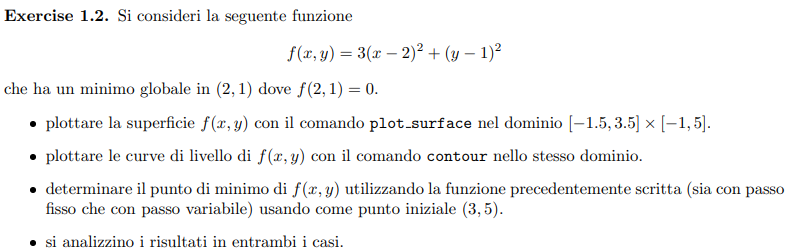

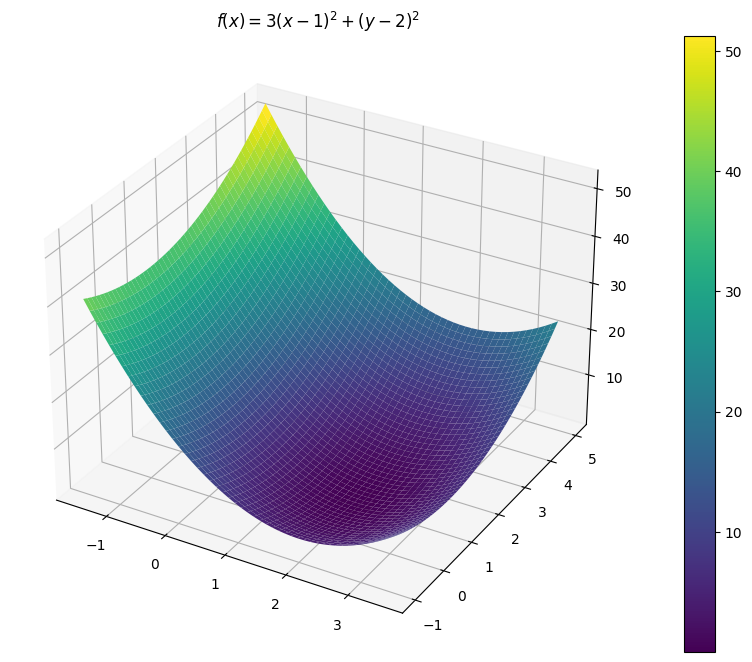

iterations= 1000
last guess: x=(2.000006,1.072677)
iterations= 20
last guess: x=(2.000001,1.000003)


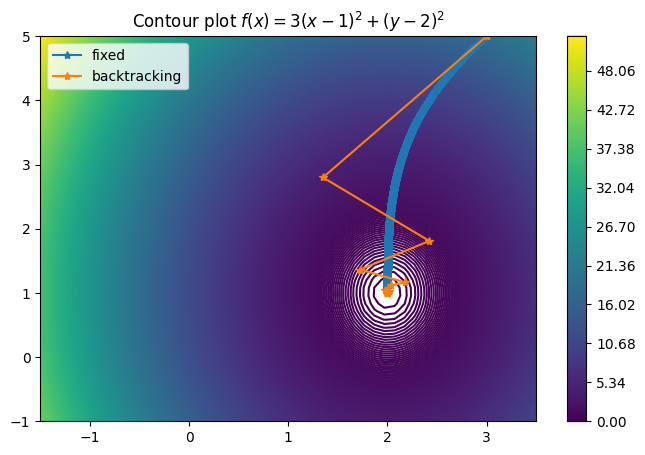

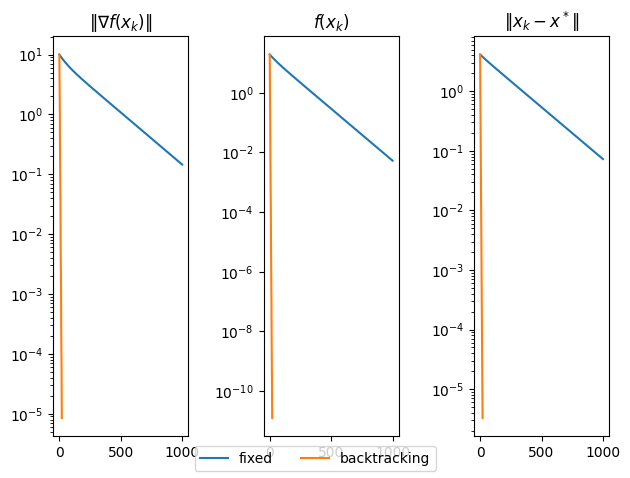

In [2]:
# Es 1.2
def f(vec):
    x, y = vec
    fout = 3*(x-2)**2 + (y-1)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 6*(x-2)
    dfdy = 2*(y-1)
    return np.array([dfdx,dfdy])

x = np.linspace(-1.5, 3.5)
y = np.linspace(-1, 5)

X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)

fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection='3d')
ax.set_title('$f(x)=3(x-1)^2 + (y-2)^2$')
#ax.view_init(elev=50., azim=30)
s = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(s)
plt.show()

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=3(x-1)^2 + (y-2)^2$')
fig.colorbar(contours)

#plt.show()


step = 0.002
maxitS=1000
tol=1.e-5
x0 = np.array([3,5])
xTrue = np.array([2,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.tight_layout()
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
plt.show()

iterations= 27
last guess: x=(2.000000,1.000004)
iterations= 20
last guess: x=(2.000001,1.000003)


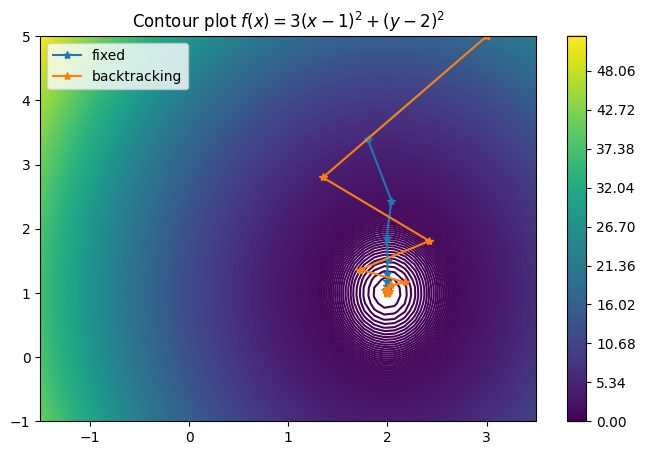

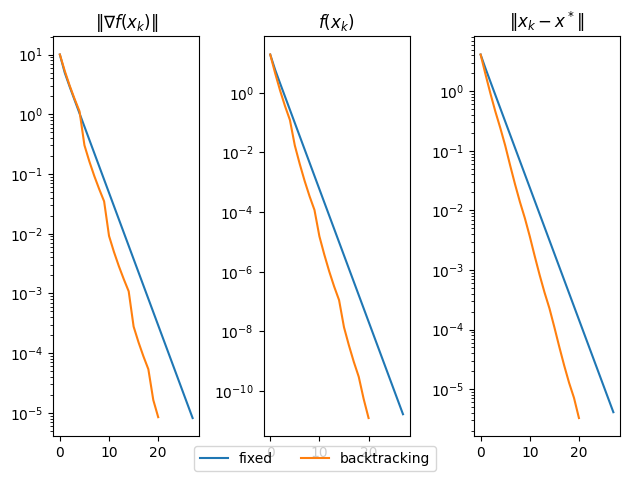

In [7]:
# Es 1.2
def f(vec):
    x, y = vec
    fout = 3*(x-2)**2 + (y-1)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 6*(x-2)
    dfdy = 2*(y-1)
    return np.array([dfdx,dfdy])

x = np.linspace(-1.5, 3.5)
y = np.linspace(-1, 5)

X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=3(x-1)^2 + (y-2)^2$')
fig.colorbar(contours)

#plt.show()

step = 0.2
maxitS=1000
tol=1.e-5
x0 = np.array([3,5])
xTrue = np.array([2,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.tight_layout()
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
plt.show()

iterations= 24
last guess: x=(2.000000,0.999995)
iterations= 19
last guess: x=(1.999999,0.999997)


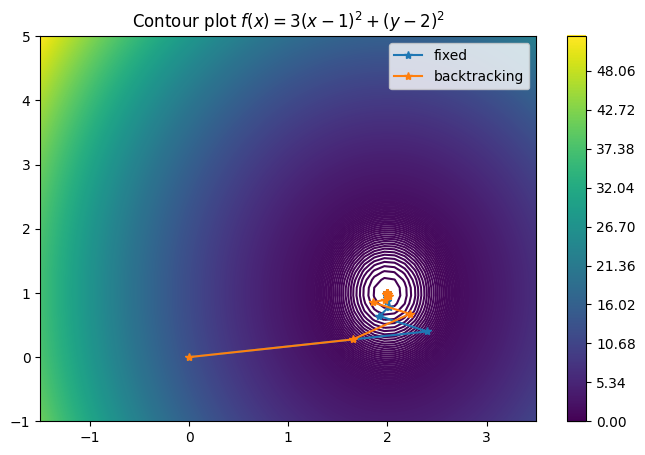

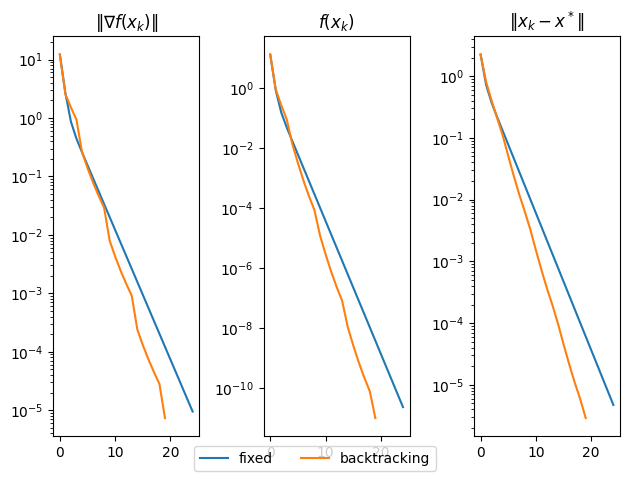

In [9]:
# Es 1.2
def f(vec):
    x, y = vec
    fout = 3*(x-2)**2 + (y-1)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 6*(x-2)
    dfdy = 2*(y-1)
    return np.array([dfdx,dfdy])

x = np.linspace(-1.5, 3.5)
y = np.linspace(-1, 5)

X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=3(x-1)^2 + (y-2)^2$')
fig.colorbar(contours)

#plt.show()

step = 0.2
maxitS=1000
tol=1.e-5
x0 = np.array([0,0])
xTrue = np.array([2,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.tight_layout()
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
plt.show()

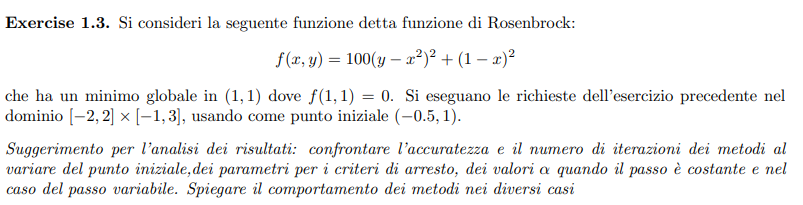

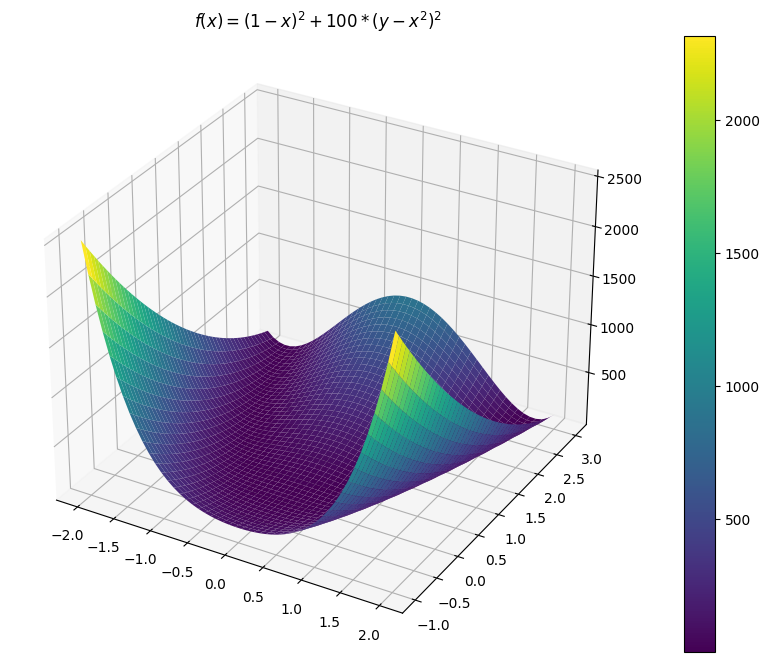

iterations= 1000
last guess: x=(0.482604,0.230313)
iterations= 1000
last guess: x=(0.992916,0.985849)


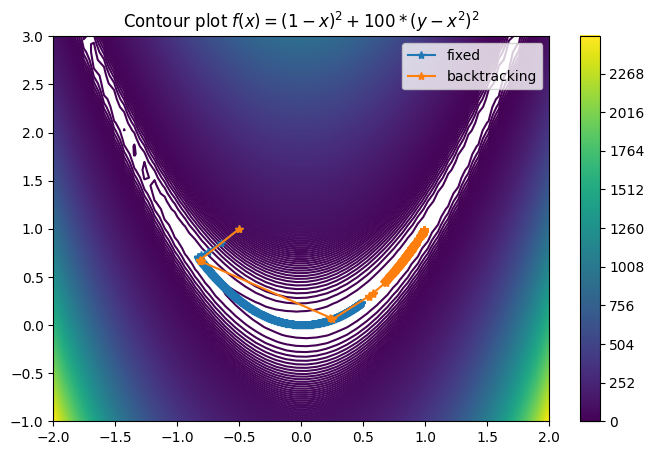

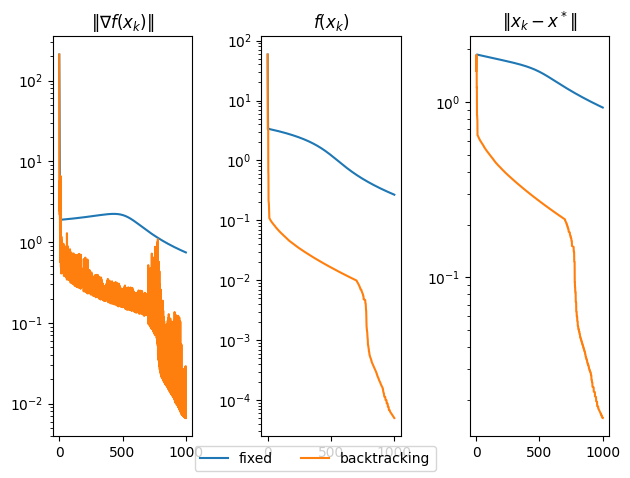

In [5]:
# Es 1.3
def f(vec):
    x, y = vec
    fout = 100*(y-x**2)**2 + (1-x)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 2*(200*x**3 - 200*x*y + x - 1)
    dfdy = 200*(y-x**2)
    return np.array([dfdx,dfdy])

x = np.linspace(-2,2)
y = np.linspace(-1,3)
X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)


fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection='3d')
ax.set_title('$f(x)=(1-x)^2+100*(y-x^2)^2$')
#ax.view_init(elev=50., azim=30)
s = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(s)
plt.show()

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=(1-x)^2+100*(y-x^2)^2$')
fig.colorbar(contours)
#plt.show()


step = 0.001
maxitS=1000
tol=1.e-5
x0 = np.array([-0.5,1])
xTrue = np.array([1,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
fig.tight_layout()
plt.show()

iterations= 1000
last guess: x=(0.895183,0.800907)
iterations= 1000
last guess: x=(0.998141,0.996279)


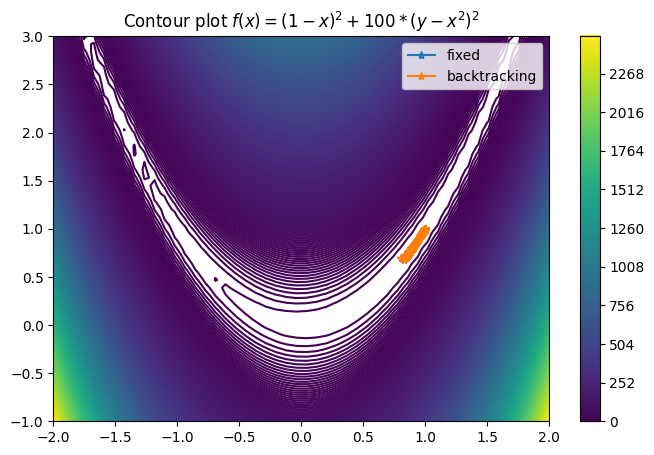

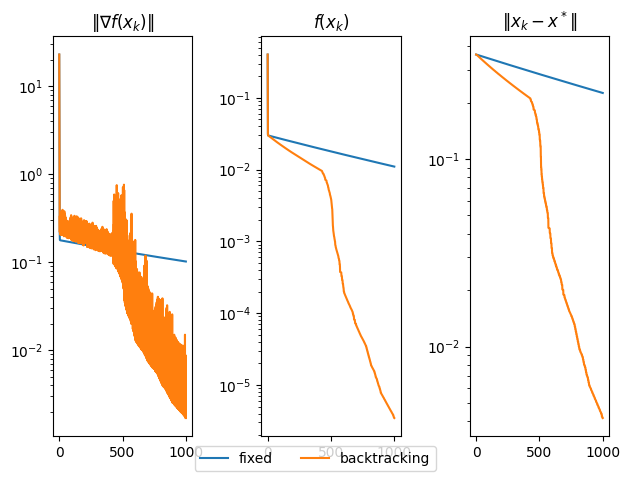

In [6]:
# Es 1.3
def f(vec):
    x, y = vec
    fout = 100*(y-x**2)**2 + (1-x)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 2*(200*x**3 - 200*x*y + x - 1)
    dfdy = 200*(y-x**2)
    return np.array([dfdx,dfdy])

x = np.linspace(-2,2)
y = np.linspace(-1,3)
X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)




fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=(1-x)^2+100*(y-x^2)^2$')
fig.colorbar(contours)
#plt.show()


step = 0.001
maxitS=1000
tol=1.e-5
x0 = np.array([0.8,0.7])
xTrue = np.array([1,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
fig.tight_layout()
plt.show()

iterations= 1000
last guess: x=(1.179359,1.391533)
iterations= 1000
last guess: x=(1.124308,1.264425)


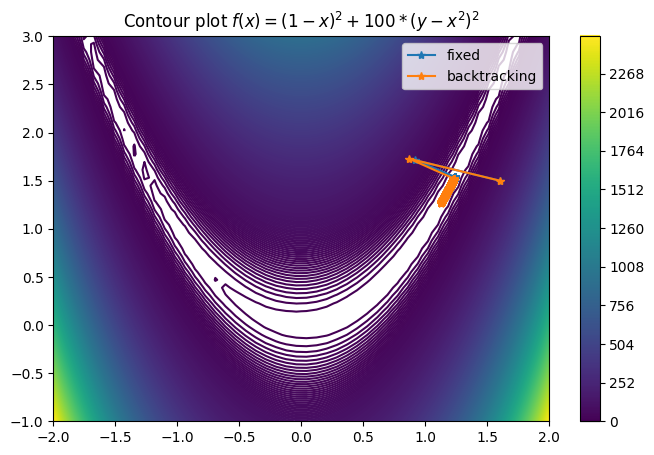

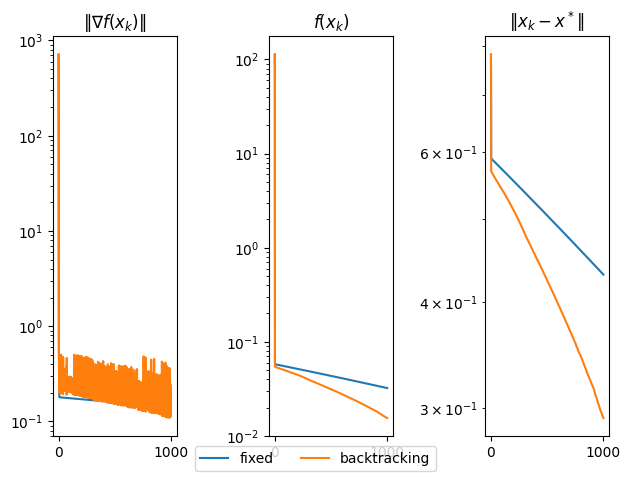

In [11]:
# Es 1.3
def f(vec):
    x, y = vec
    fout = 100*(y-x**2)**2 + (1-x)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 2*(200*x**3 - 200*x*y + x - 1)
    dfdy = 200*(y-x**2)
    return np.array([dfdx,dfdy])

x = np.linspace(-2,2)
y = np.linspace(-1,3)
X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)


fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=(1-x)^2+100*(y-x^2)^2$')
fig.colorbar(contours)
#plt.show()


step = 0.001
maxitS=1000
tol=1.e-5
x0 = np.array([1.6,1.5])
xTrue = np.array([1,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k], xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
fig.tight_layout()
plt.show()